In [37]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import math
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

In [38]:
dict_vals={"H":1.372,"A":3.471,"I":0.592,"R":1.326,"L":0.634,"D":2.490,"K":0.121,"N":0.674,"M":0.994
,"C":1.496,"F":0.418,"E":3.580,"T":0.097,"Q":3.517,"W":0.003,"G":1.844,"V":0.591,"S":1.574,"P":0.780,"Y":0.740}

In [39]:
name="utmb"
# name="liverpool"

In [40]:
# data=pd.read_csv(f"C:\\Workplace\\C++\\d2ome_v2\\v2\\v2\\bin\\Debug\\Estimated_neh_numbers.csv")#.dropna().reset_index(drop=True)
data=pd.read_csv(f"{name}_Estimated_neh_numbers.csv")#.dropna().reset_index(drop=True)

print(data.shape)
ilch=[]
for i in range( data.shape[0]):
    res=0
    for c in data.Peptide[i]:
        res+=dict_vals[c.upper()]
    ilch.append(res)
data["ilch"]=ilch
data.columns

(1788, 10)


Index(['Protein', 'Peptide', 'Charge', 'T_NEH', 'Asym_NEH', 'MPE_NEH',
       'APE_NEH', 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE', 'ilch'],
      dtype='object')

In [41]:
def plot_hitmap(colx,coly,xlabel,ylabel,file_name,k):
    
    plt.rc('font', size=15) 
    plt.rc('figure', figsize=(8,6))     
    
    x = colx #[math.log(x) for x in colx]
    y = coly#[math.log(x) for x in coly]

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    cb=plt.scatter(x, y, c=z, s=15,alpha=0.8,cmap='magma',
                   label=f"n = {len(x)} \n r = {'{0:.2f}'.format(np.corrcoef(x,y)[0][1])}\n R$^2$ = {'{0:.2f}'.format(r2_score(x,y))}")    
    cbar = plt.colorbar(cb)
    
    
    plt.vlines(x=0.05,ymin=min(y)-2,ymax=max(y)+2,color='b',ls="-.")
    plt.vlines(x=0.01,ymin=min(y)-2,ymax=max(y)+2,color='g',ls="-.")
    
    
    
    plt.xlim([0,0.09])
    plt.ylim([min(y)-2,max(y)+2]) 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel)
#     plt.legend()
    plt.savefig(file_name+".jpeg",dpi=900,bbox_inches='tight')
    plt.show()   
    


In [42]:
575 / 1659

0.3465943339361061

======================> Asym_NEH
1782 0.9966442953020134
934 0.5241301907968574


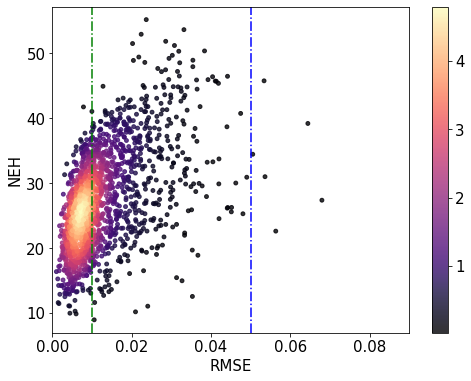

======================> MPE_NEH
1660 0.9284116331096197
575 0.3463855421686747


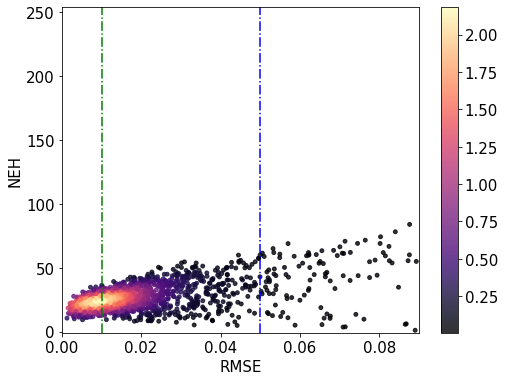

======================> APE_NEH
1787 0.9994407158836689
1116 0.6245103525461667


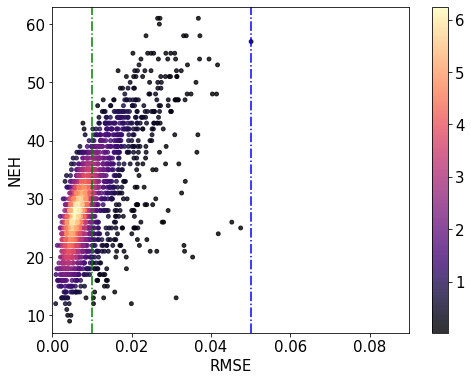

In [43]:
meth=['Asym_NEH', 'MPE_NEH',       'APE_NEH']
rmse=[ 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE']
# print(data[data.Asym_RMSE<=0.01].shape[0]/data.shape[0])
# plot_hitmap(data.Asym_RMSE,data.Asym_NEH,"","","")
for i in range(0,3):
    print("======================> "+ meth[i])
    print(data[data[rmse[i]]<=0.05].shape[0],data[data[rmse[i]]<=0.05].shape[0]/data.shape[0])
    print(data[data[rmse[i]]<=0.01].shape[0],data[data[rmse[i]]<=0.01].shape[0]/data[data[rmse[i]]<=0.05].shape[0])
    plot_hitmap(data[rmse[i]],data[meth[i]],"RMSE","NEH",meth[i],data.T_NEH)

======================> Asym_NEH
0.9966442953020134
934 0.5223713646532439


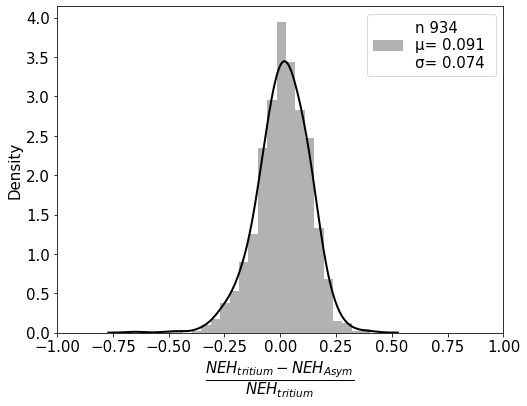

======================> MPE_NEH
0.9284116331096197
575 0.32158836689038034


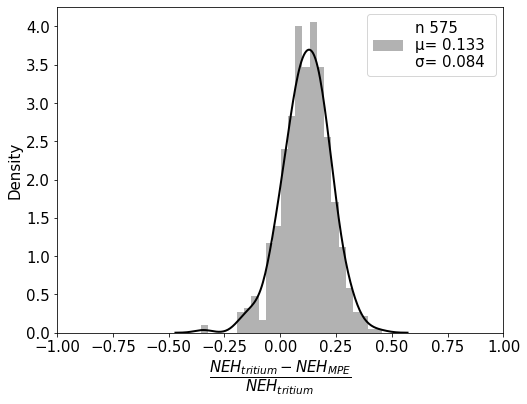

======================> APE_NEH
0.9994407158836689
1116 0.6241610738255033


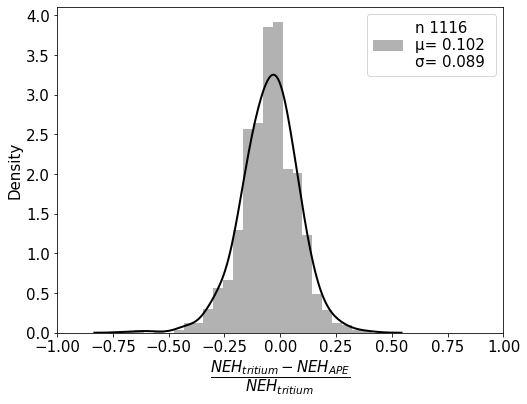

In [44]:
def plot_hitmap(y,xlabel,ylabel,file_name,k):
    
    plt.rc('font', size=15) 
    plt.rc('figure', figsize=(8,6))         
    
    
    x=k
    bins=25
    lw=2
    bw=0.35
    mtd="scott"
    rd=(x-y)/x
    rd2=abs(x-y)/x
    sns.distplot(rd, hist = True,bins=bins, kde = True,color='black',
                     hist_kws={'alpha':0.3},
                         kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd},
                label=f"n {len(x)}\nμ= {'{0:.3f}'.format(np.mean(rd2))} \nσ= {'{0:.3f}'.format(np.std(rd2))} "
                )
    
    
    plt.xlabel(r'$\dfrac{ {NEH_{tritium}}-{NEH_{'+file_name.replace('_NEH','')+'}} }{NEH_{tritium}}$')
    plt.xlim([-1,1])
    plt.legend()
    plt.savefig(file_name+"_density.jpeg",dpi=900,bbox_inches='tight')
    plt.show()

    
meth=['Asym_NEH', 'MPE_NEH',       'APE_NEH']
rmse=[ 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE']

for i in range(3):
    print("======================> "+ meth[i])
    print(data[data[rmse[i]]<=0.05].shape[0]/data.shape[0])
    print(data[data[rmse[i]]<=0.01].shape[0],data[data[rmse[i]]<=0.01].shape[0]/data.shape[0])
    plot_hitmap(data[data[rmse[i]]<=0.01][meth[i]],"RMSE","NEH",meth[i],data[data[rmse[i]]<=0.01].T_NEH)

In [45]:
# res=0
# for c in "ARPALEDLR":
#     res+=dict_vals[c.upper()]
# res

In [46]:
meth=['Asym_NEH', 'MPE_NEH',       'APE_NEH']
rmse=[ 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE']

for i in range(3):
    tempdata=data[data[rmse[i]]<=0.01]
        
    rd=abs(tempdata[meth[i]]-tempdata.T_NEH)/tempdata.T_NEH
    print(len(rd),np.mean(rd),np.median(rd),np.std(rd),end="\t")
    
    rd=abs(tempdata[meth[i]]-tempdata.ilch)/tempdata.ilch
    print(np.mean(rd),np.median(rd),np.std(rd))
    
    
    

934 0.09107108053362323 0.07562561187511266 0.07416984306419944	0.27789016473899397 0.27570000597684247 0.11059596397169953
575 0.133249933565421 0.12550044322417409 0.08409441674891473	0.14682674744603397 0.13711657562332347 0.09477230350984107
1116 0.10160504625888436 0.08 0.08932690619223864	0.35445997709593013 0.3532744061438022 0.12101874760574852


In [47]:
data.columns

Index(['Protein', 'Peptide', 'Charge', 'T_NEH', 'Asym_NEH', 'MPE_NEH',
       'APE_NEH', 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE', 'ilch'],
      dtype='object')

In [48]:
data.columns=['Protein', 'Peptide', 'Charge', 'NEH (tritium labeling)', 'NEH (ASYM)', 'NEH (MPE)','NEH (APE)', 'RMSE (ASYM)', 'RMSE (RMSE)', 'RMSE (APE)', 'NEH (lchenkox,s. et. al.)']
data.to_csv(name+"_sp.csv",index=False)